In [8]:
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

In [9]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

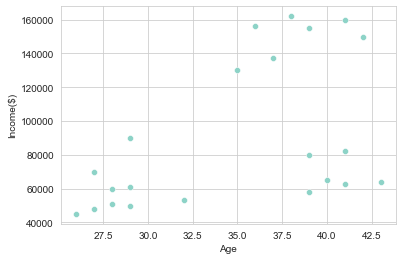

In [10]:
sns.scatterplot(x='Age', y='Income($)', data=df)

In [11]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [12]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [13]:
df['cluster'] = y_predicted
df.head(20)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


Text(0.5, 1.0, 'Age vs Income')

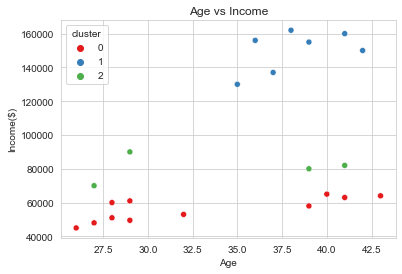

In [19]:
sns.scatterplot(x='Age', y='Income($)', data=df, hue='cluster', palette='Set1')
plt.title('Age vs Income')

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [21]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [22]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [23]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_predicted


In [24]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [25]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [27]:
km.inertia_

0.4750783498553096

Text(0.5, 1.0, 'Age vs Income')

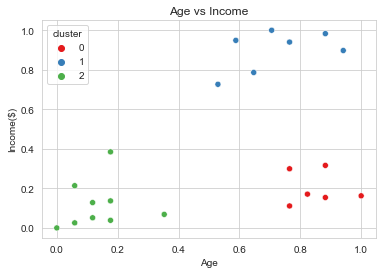

In [26]:
sns.scatterplot(x='Age', y='Income($)', data=df, hue='cluster', palette='Set1')
plt.title('Age vs Income')

In [28]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.1685851223602976,
 0.1397684499538816,
 0.10188787724979426]

[]

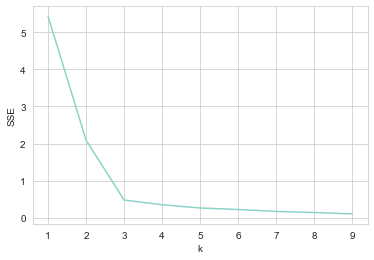

In [29]:
plt.plot(range(1,10), sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot()